<div class="alert alert-block alert-info " style=' color:MidnightBlue; background-color: AliceBlue ;  border-radius: 30px; border-color: black; '>
<hr><h1 > Examen blanc d'intelligence artificielle II - MIN 5A -  <img  src="   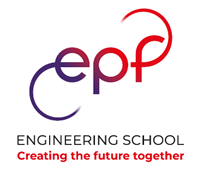" align="right"  width="100" > 
 <br>
     <br>
    <br>
 <hr>
</div>


*Entrez votre Nom, Prénom et Majeure ici*

<div class="alert alert-block alert-info" style='color:midnightblue; background-color: AliceBlue ; border-radius: 30px; border-color: black; '> 
    <hr><h2>1.	Partie classification </h2><hr>    
    <ol>
Vous allez utiliser pour résoudre un problème de classification la base de données
fetch_olivetti_faces(). Cette base de données comprend 400 images de visages de personnes de
taille 64×64 correspondants à 40 personnes différentes. La sortie est alors un indice (une étiquette
ou un libellé) de 0 à 39 correspondant au numéro de la personne identifiée.

 <br>
    </ol>
</div>

<div class="alert alert-block alert-info" style='color:MidnightBlue; background-color: AliceBlue ; border-radius: 30px; border-color: black; '>
3.1 L'ensemble de données est disponible dans la bibliothèque scikit-learn. Commencez par
importer datasets du module sklearn, puis chargez la base de données via l’instruction
datasets.fetch_olivetti_faces(). <br><br>
3.2 Affichez la taille de cet ensemble de données. <br><br>
3.3 Exécutez le code suivant qui permet d’afficher des images de cette base de données.
Expliquez le visuel.
<CODE>
fig = plt.figure() 
for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(faces.images[i], cmap=plt.cm.bone)
</CODE>
Donnez le code qui permet d’afficher un visuel comprenant 40 images de visages
ordonnées en 4 lignes de 10 images chacune. <br><br>
3.4 Soit X les observations et Y les sorties correspondantes. Sachant qu’on accède aux
observations via l’attribut data et aux sorties via l’attribut target appliqués tous les deux à la
base de données (nom_bd.data et nom_bd.target), afficher la taille des données X et Y. <br><br>
3.5 Utilisez l’instruction train_test_split pour diviser la base de données X et Y en base
d’apprentissage X_train et Y_train et en base de test X_test et Y_test avec un ratio de taille
de test =0.25, le paramètre shuffle à True et le paramètre random_state à 0. <br><br>
3.6 Affichez la taille de X_train et X_test et expliquez les données obtenues. <br><br>
3.7 Les images ayant beaucoup de données. Nous allons à présent appliquer une méthode pour
réduire le nombre de ces données. Cette méthode s’appelle la PCA, appliquez-là en
exécutant les lignes de code suivantes :
<CODE>
from sklearn import decomposition
pca = decomposition.PCA(n_components=150, whiten=True, svd_solver='randomized')
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
</CODE>
Affichez la taille de X_train_pca et X_test_pca 
     <br><br>
Dans tout ce qui suit, vous utiliserez X_train_pca et X_test_pca au lieu de X_train
et X_test. Les sorties ne changent pas, vous utiliserez toujours Y_train et Y_test.
    </div>

(400, 4096)
(400, 4096)
(400,)
(300, 4096) (100, 4096)
(300, 150)
(100, 150)


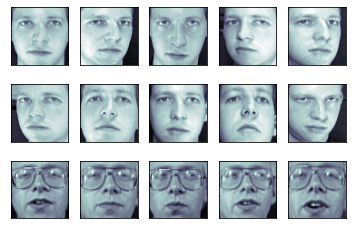

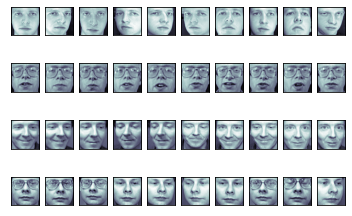

In [5]:
#Insérez votre code ici
from matplotlib import pyplot as plt

from sklearn import datasets
faces = datasets.fetch_olivetti_faces()
print(faces.data.shape)

fig = plt.figure() 
for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(faces.images[i], cmap=plt.cm.bone)

fig = plt.figure()
for i in range(40):
    ax = fig.add_subplot(4, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(faces.images[i], cmap=plt.cm.bone)
    
X=faces.data
y=faces.target
print(X.shape)
print(y.shape)    

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,shuffle=True, random_state=0)
print(X_train.shape, X_test.shape)

from sklearn import decomposition
pca = decomposition.PCA(n_components=150, whiten=True, svd_solver='randomized')
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape)
print(X_test_pca.shape)



<div class="alert alert-block alert-info" style='color:MidnightBlue; background-color: AliceBlue ; border-radius: 30px; border-color: black; '>
    <B> Méthode 1 </B><br>
    <br>
3.8 Appliquez un classifieur en utilisant SVC avec comme paramètre kernel='linear'. <br> <br>
3.9 Entrainez le classifieur sur les données d’apprentissage.<br> <br>
3.10 Réalisez la prédiction sur les données de test (sans utiliser la validation croisée).<br> <br>
3.11 Affichez le rapport de classification via l’instruction metrics.classification_report() en fonction
des sorties de test Y_test et des sorties prédites. <br>
    </div>

In [7]:
#méthode 1

from sklearn import smv

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train_pca, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test_pca)
from sklearn.metrics import classification_report,confusion_matrix,multilabel_confusion_matrix

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(multilabel_confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       1.00      1.00      1.00         4
           2       0.50      1.00      0.67         2
           3       1.00      1.00      1.00         1
           4       0.50      1.00      0.67         1
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         4
           7       1.00      0.67      0.80         3
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         4
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         5
          15       0.75      1.00      0.86         3
          17       1.00      1.00      1.00         6
          19       1.00      1.00      1.00         4
          20       1.00    


<div class="alert alert-block alert-info" style='color:MidnightBlue; background-color: AliceBlue ; border-radius: 30px; border-color: black; '>
    <B> Méthode 2 </B><br>
    <br>
3.12 Implémentez un classifieur via SGDClassifier en prenant comme paramètre random_state=42.<br><br>
3.13 Entrainez le classifieur sur les données d’apprentissage.<br><br>
3.14 Réalisez la prédiction sur les données de test (sans utiliser la validation croisée).<br><br>
3.15 Affichez le rapport de classification via l’instruction metrics.classification_report() en fonction
des sorties de test Y_test et des sorties prédites.<br>
    </div>

In [9]:
#méthode 2

from  sklearn.linear_model  import  SGDClassifier
sg_clf = SGDClassifier(random_state=42)
sg_clf.fit(X_train_pca, y_train)
y_pred_sg = sg_clf.predict(X_test_pca)

print(classification_report( y_test ,  y_pred_sg))
print(confusion_matrix ( y_test ,  y_pred_sg))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83         6
           1       1.00      1.00      1.00         4
           2       0.33      0.50      0.40         2
           3       0.50      1.00      0.67         1
           4       1.00      1.00      1.00         1
           5       1.00      0.80      0.89         5
           6       0.80      1.00      0.89         4
           7       1.00      0.67      0.80         3
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         4
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         5
          15       0.75      1.00      0.86         3
          17       1.00      0.83      0.91         6
          19       1.00      1.00      1.00         4
          20       1.00    

C:\tools\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\tools\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\tools\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



<div class="alert alert-block alert-info" style='color:MidnightBlue; background-color: AliceBlue ; border-radius: 30px; border-color: black; '>
    <B> Méthode 3 </B><br>
    <br>
3.16 Créer un classifieur implémenté via LinearSVC en utilisant comme paramètres : C=1,
dual=False, random_state=42, et un nombre d’itérations max = 1200000.<br><br>
3.17 Entrainez le classifieur sur les données d’apprentissage.<br><br>
3.18 Réalisez la prédiction sur les données de test (sans utiliser la validation croisée).<br><br>
3.19 Affichez le rapport de classification via l’instruction metrics.classification_report() en fonction
des sorties de test Y_test et des sorties prédites.<br>
    </div>

In [10]:
#méthode 3

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
svm = Pipeline([
        ("scaler", StandardScaler()),
        ("linear_svc", LinearSVC(C=1,  dual=False, random_state=42,max_iter=1200000)),])

svm.fit(X_train_pca, y_train)
y_predict=svm.predict(X_test_pca)


from  sklearn . metrics  import  confusion_matrix
from sklearn import metrics
print(metrics.classification_report( y_test ,  y_predict))
print(confusion_matrix ( y_test ,  y_predict))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         6
           1       1.00      1.00      1.00         4
           2       0.33      0.50      0.40         2
           3       1.00      1.00      1.00         1
           4       0.50      1.00      0.67         1
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         4
           7       1.00      0.67      0.80         3
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         4
          11       1.00      1.00      1.00         1
          12       0.67      1.00      0.80         2
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         5
          15       0.60      1.00      0.75         3
          17       1.00      1.00      1.00         6
          19       1.00      1.00      1.00         4
          20       1.00    


<div class="alert alert-block alert-info" style='color:MidnightBlue; background-color: AliceBlue ; border-radius: 30px; border-color: black; '>
    <B> Validation croisée </B><br>
    <br>
3.20 Effectuez une validation croisée sur les données d’apprentissage en important la fonction
cross_val_score() de la librairie sklearn.model_selection et en l’utilisant avec 4 plis et en
choisissant un modèle parmi ceux des implémentations précédentes. Afficher le score de
chacun de ces 4 plis.<br><br>
3.21 Calculer et afficher le score global de la validation croisée sur la base d’apprentissage.<br>
    </div>

In [11]:
from  sklearn . model_selection  import  cross_val_score  
print("cross_val_score = ", cross_val_score(clf,X_train_pca,y_train,cv=4)) 

#le score global = la moyenne des 4 scores précédents
from statistics import mean
print("score global = ",mean(cross_val_score(clf,X_train_pca,y_train,cv=4)))

cross_val_score =  [0.69333333 0.69333333 0.77333333 0.74666667]
score global =  0.7266666666666667


<div class="alert alert-block alert-info" style='color:midnightblue; background-color: AliceBlue ; border-radius: 30px; border-color: black; '> 
    <hr><h2>2.	Partie regession </h2><hr>    
    <ol> 
    
Pour cette partie, on vous demande d’utiliser les données du fichier regression2B.csv. Les données
contenues dans ce fichier vont vous permettre de prédire le salaire d'un nouvel employé dont le
niveau d'expérience est de 6 ans et demi et qui dit que l'entreprise précédente lui avait payé 160000
et qu'il voulait un salaire plus élevé. Les données que vous utiliserez pour cette prédiction
comprennent trois colonnes : Position, niveau et salaire. Vous utiliserez dans un premier temps la
régression linéaire puis la régression polynomiale pour prédire le salaire du nouvel employé en
fonction des données dont vous disposez.
 <br>       



</div>

<div class="alert alert-block alert-info" style='color:MidnightBlue; background-color: AliceBlue ; border-radius: 30px; border-color: black; '>
        <B> Méthode 1 </B><br>
    <br>
2.1 Importez les données du fichier regression2B.csv en utilisant la bibliothèque pandas et la
fonction read_csv().<br><br>
2.2 La fonction read_csv(), renvoie un DataFrame de plusieurs colonnes. Séparez les deux
variables X et Y en utilisant l’instruction iloc [ ] de telle sorte que les entrées X correspondent
à la 2ème colonne (celle d’indice 1) et les sorties Y correspondent à la troisième colonne (celle
d’indice 2).<br><br>
2.3 Redimensionner les données X et Y de telle sorte qu’ils soient de dimension (nombre de
lignes du tableau,1).<br><br>
2.4 Créez un modèle de régression linéaire implémenté dans scikit-learn via la fonction
LinearRegression( ).<br><br>
2.5 Appliquez ce modèle aux données pour l’entrainer sur X, Y.<br><br>
2.6 Déterminer les coefficients du modèle linéaire et donner la formule de l’équation de ce
modèle.<br><br>
2.7 Faites la prédiction sur X pour produire y_predicted.<br><br>
2.8 Affichez le graphe des données en affichant les données en forme de nuages de points
et l’allure du modèle en rouge.<br><br>
2.9 Affichez les scores RMSE et R2 entre y_predicted et Y.<br><br>
2.10 Donnez la prédiction du modèle sur la donnée 7.5.<br>

</div>

<bound method DataFrame.info of             Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000>
[-195333.33333333] [[80878.78787879]]


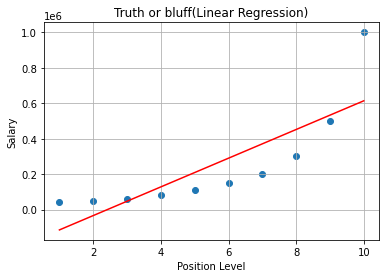

[[411257.57575758]]
rmse =  163388.73519272613
r2 =  0.6690412331929895


In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#importing the dataset
dataset=pd.read_csv(r'C:\EPF\sauvegarde_anterieure\enseignement_ESME\année2020_2021\ML\TP1\2B\Position_Salaries.csv')
print(dataset.info)

X=dataset.iloc[0:len(dataset),1]
X=X.values.reshape(len(X),1)
y=dataset.iloc[0:len(dataset),2]
y=y.values.reshape(len(y),1)

#2)visualisation des données
axes = plt.axes()
axes.grid() # dessiner une grille pour une meilleur lisibilité du graphe
plt.scatter(X,y) # X et Y sont les variables qu'on a extraite dans le paragraphe précédent



#fitting the linear regression model to the dataset
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X,y)
y_pred = lin_reg.predict(X)
print(lin_reg.intercept_, lin_reg.coef_)
#l'équation est y=a*X+b (avec a=lin_reg.coef_ et b=lin_reg.intercept)
#Visualisng the linear regression model results

plt.plot(X,y_pred,color='red')
plt.title('Truth or bluff(Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

#predictig the result of linear regression model.
print(lin_reg.predict( [[ 7.5 ]] ))
#Affcihage des métrique rmse et r2
from sklearn.metrics import mean_squared_error, r2_score
rmse = np.sqrt(mean_squared_error(y,y_pred))
r2 = r2_score(y,y_pred)
print("rmse = ",rmse)
print("r2 = ",r2)

<div class="alert alert-block alert-info" style='color:MidnightBlue; background-color: AliceBlue ; border-radius: 30px; border-color: black; '>
            <B> Méthode 2 </B><br>
    <br>
2.11 Créez un modèle de régression polynomiale implémenté dans scikit-learn. Expliquez
comment se fait l’implémentation.<br><br>
2.12 Appliquez ce modèle aux données pour l’entrainer sur X, Y.<br><br>
2.13 Faites la prédiction sur X pour produire y_pred_poly.<br><br>
2.14 Affichez sur le graphe des données en affichant les données en forme de nuages de points
et l’allure du modèle en rouge.<br><br>
2.15 Affichez les scores RMSE et R2 entre y_pred_poly et Y.<br><br>
2.16 Donnez la prédiction du modèle sur la donnée 7.5.<br>
    </div>

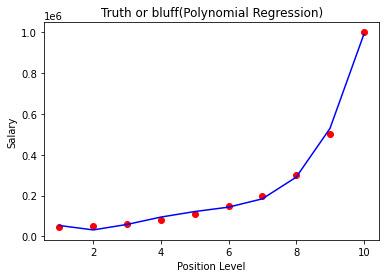

rmse =  14503.234909626832
r2 =  0.9973922891706614
[[225126.29297782]]


In [52]:
#fitting the polynomial regression model to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=4)
X_poly=poly_reg.fit_transform(X)
poly_reg.fit(X_poly,y)
lin_reg2=LinearRegression()
lin_reg2.fit(X_poly,y)
y_pred_poly=lin_reg2.predict(poly_reg.fit_transform(X))
#Visualising the pollynomial regression model results
X_grid=np.arange(min(X),max(X),0.1)
X_grid=X_grid.reshape((len(X_grid),1))
plt.scatter(X,y,color='red')
plt.plot(X,y_pred_poly,color='blue')
plt.title('Truth or bluff(Polynomial Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

rmsep = np.sqrt(mean_squared_error(y,y_pred_poly))
r2p = r2_score(y,y_pred_poly)
print("rmse = ",rmsep)
print("r2 = ",r2p)
#predicting the result of polynomial regression.
print(lin_reg2.predict( poly_reg.fit_transform([ [7.5] ] )))

<div class="alert alert-block alert-info" style='color:MidnightBlue; background-color: AliceBlue ; border-radius: 30px; border-color: black; '>
                <B> Méthode 3 </B><br>
    <br>
2.17 Appliquez l’algo KNN en choisissant K=2 et en entrainant le modèle sur les données X et
y.<br><br>
2.18 Faites la prédiction sur X pour produire y_predknn.<br><br>
2.19 Visualisez ces données en les affichant sous forme de nuage de points. Tracez la courbe
prédictive des données en rouge.<br><br>
2.20 Affichez les scores RMSE et R2 entre y_predknn et y.<br>
    </div>


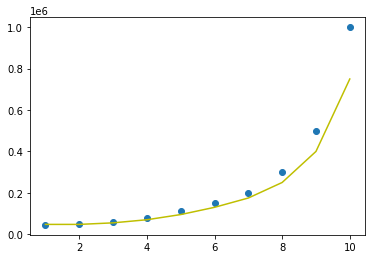

Mean squared error: 87399.94
Coefficient of determination: 0.91


In [61]:
#3)Apliquer l'algo des kpppv
import sklearn.neighbors
# Selection de l'algorihtme des k plus proches voisins
modelek = sklearn.neighbors.KNeighborsRegressor(n_neighbors=2)
# Entrainement du modèle
modelek.fit(X, y)
# Make predictions using the testing set
y_predknn = modelek.predict(X)

#Affichage du graphique
plt.scatter(X, y)
plt.plot(X, y_predknn, color='y')
plt.show()

# The mean squared error
print('Mean squared error: %.2f'
      % math.sqrt(mean_squared_error(y, y_predknn)))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y, y_predknn))

<div class="alert alert-block alert-info" style='color:MidnightBlue; background-color: AliceBlue ; border-radius: 30px; border-color: black; '>
                <B> Etude comparative </B><br>
    <br>
2.17 Expliquez selon vous quelle méthode est la meilleure pour prédire le salaire du nouvel
employer. Analysez et discutez les résultats obtenus.<br>
        </div>

In [ ]:
### regression polynomiale